In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
%matplotlib inline
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['kc_house_data.csv']


In [60]:
houses = pd.read_csv('../input/kc_house_data.csv')

In [72]:
houses.date = houses.date.astype('datetime64')
houses['year'] = houses.date.map(lambda x: x.year)
houses['month'] = houses.date.map(lambda x: x.month)

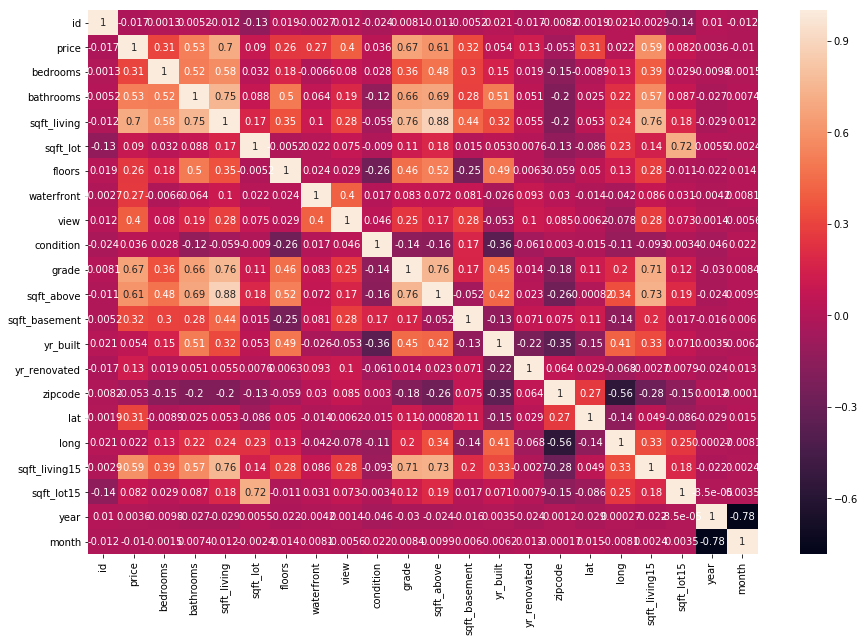

In [79]:
corr = houses.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [80]:
X = houses.drop(columns=['id', 'price', 'date', 'condition', 'long', 'sqft_lot15', 'zipcode', 'yr_built', 'sqft_lot'])
y = houses['price']

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [83]:
X_train.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,year,month
6560,3,2.50,1920,2.0,0,0,8,1920,0,0,47.7144,1380,2015,2
10802,4,2.50,2620,2.0,0,0,9,2620,0,0,47.4357,2760,2014,7
8989,3,2.50,1590,2.0,0,0,7,1590,0,0,47.6100,1940,2014,8
1761,5,2.75,2540,1.0,0,0,8,1540,1000,0,47.5593,2510,2014,7
5749,4,2.50,3830,1.0,1,4,11,2370,1460,0,47.7404,3080,2015,4


### LinearRegression

MAE:  133789.52669464392
MSE:  45708169820.973366
RMSE:  213794.6908156827


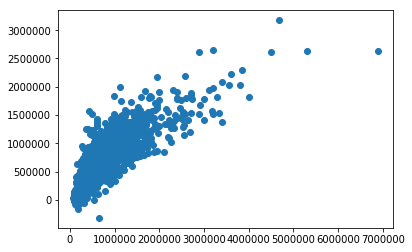

In [84]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
pred = model.predict(X_test)
plt.scatter(y_test, pred)

from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_test, pred))
print('MSE: ', metrics.mean_squared_error(y_test, pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, pred)))

### RandomForestRegressor

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE:  91368.41568990334
MSE:  26062831499.240475
RMSE:  161439.869608596


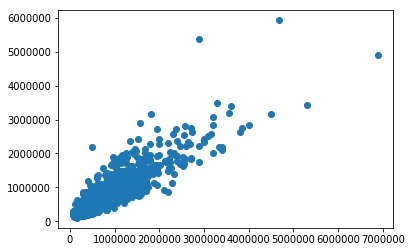

In [85]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred =model.predict(X_test)
plt.scatter(y_test, pred)

from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_test, pred))
print('MSE: ', metrics.mean_squared_error(y_test, pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, pred)))

### BagginRegressor

MAE:  91709.06091404484
MSE:  26674373797.964886
RMSE:  163322.9126545473


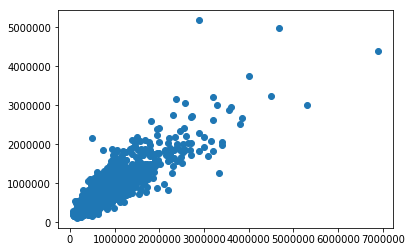

In [86]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
plt.scatter(y_test, pred)

from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_test, pred))
print('MSE: ', metrics.mean_squared_error(y_test, pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE:  162694.5582973473
MSE:  73981990937.21313
RMSE:  271996.30684480467


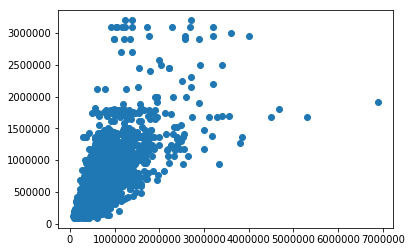

In [87]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)
plt.scatter(y_test, pred)

from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_test, pred))
print('MSE: ', metrics.mean_squared_error(y_test, pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE:  121835.89990746453
MSE:  52593340959.50355
RMSE:  229332.3809659324


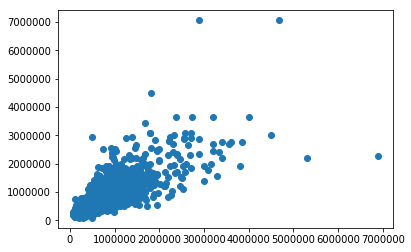

In [88]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
plt.scatter(y_test, pred)

from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_test, pred))
print('MSE: ', metrics.mean_squared_error(y_test, pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, pred)))